# Linear Regression
* Linearity: There should be a linear relationship between the features and the target
* Independence of Errors: Errors (residuals) should be independent of each other. Patterns in a residual plot may suggest a lack of independence
* Homoscedasticity: Variance of errors should be constant. An example of heteroscedsticity (bad) is if you have a conal shape in your residual plot
* Normality of Errors: The errors should be normally distributed. Check the Q-Q plot - if the residuals are normally distributed, then the points should fall approximately along a straight line
* No multicollinearity: Features should not be highly correlated with each other. You can either make a correlation matrix, or check for VIF - a value greater than 10 (or 5) suggests high multicollinearity

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
X, y = make_regression(n_samples=10000, n_features = 10, noise = 10, random_state = 42)
feature_names = ["feature " + str(i) for i in range(1, len(X[0,:])+1)]
X = pd.DataFrame(dict(zip(feature_names, np.transpose(X))))

In [3]:
# We will split the data here
# If you have access to a separate test set, treat this as validation to make sure your data satisfies the assumptions
# of linear regression. Retrain on the entire dataset and then make predictions on the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# Create and fit Linear Regerssion model to training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test (or validation set)
y_pred = model.predict(X_test)

# Print R-Squared and MSE
print(f"Training R-Squared: {model.score(X_train, y_train):.4f}")
print(f"Testing R-Squared: {model.score(X_test, y_test):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

Training R-Squared: 0.9961
Testing R-Squared: 0.9964
Mean Squared Error: 93.4881


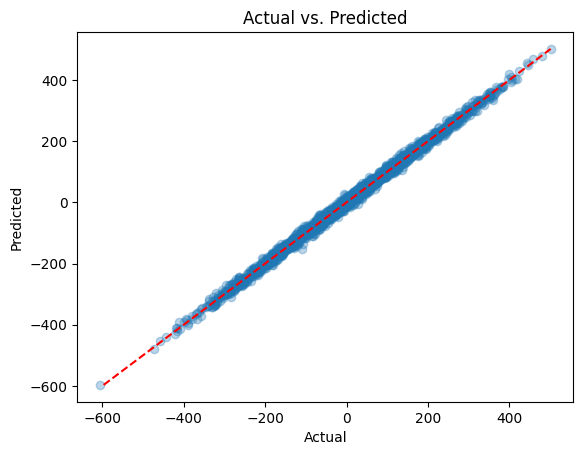

In [5]:
# Plot Actual Values vs. Predicted Values
x_line = y_line = np.linspace(min(y_pred), max(y_pred), 1000)
plt.scatter(y_test, y_pred, alpha = 0.3)
plt.plot(x_line, y_line, color = "red", linestyle = "--")
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

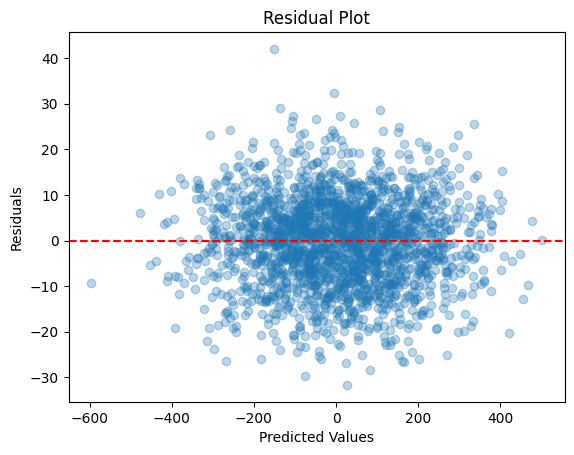

In [6]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha = 0.3)
plt.axhline(y = 0, color = "red", linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

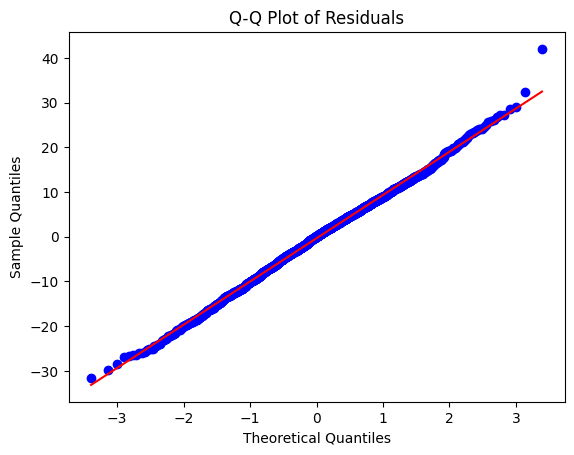

In [7]:
# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [8]:
# Calculate VIF for each feature
# Consider dropping features with VIF over 10 (or 5, your choice)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(X_train)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif)

       feature       VIF
0        const  1.000601
1    feature 1  1.000677
2    feature 2  1.000702
3    feature 3  1.000852
4    feature 4  1.001802
5    feature 5  1.001309
6    feature 6  1.001287
7    feature 7  1.001774
8    feature 8  1.001347
9    feature 9  1.002130
10  feature 10  1.001766
